# Exploring and Processing the Data

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 403s 2us/step


In [4]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [5]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In order to see the image as an image rather than a series of pixel value numbers, we will use a function from matplotlib:

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

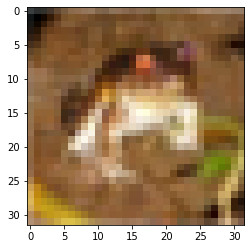

In [7]:
img = plt.imshow(x_train[0])

In [8]:
print('The label is:', y_train[0])

The label is: [6]


Let's explore one more image, the second image (with index 1 instead of 0) in our training dataset:

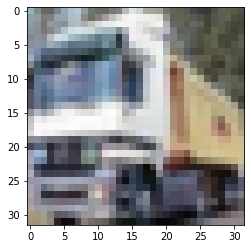

In [9]:
img = plt.imshow(x_train[1])

In [10]:
print('The label is:', y_train[1])

The label is: [9]


In [11]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [12]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

# Building and Training our Convolutional Neural Network

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))

In [33]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [34]:
model.add(Conv2D(32, (3, 3), activation='tanh', padding='same'))

In [35]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [36]:
model.add(Dropout(0.25))

In [37]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [38]:
model.add(Flatten())

In [39]:
model.add(Dense(512, activation='relu'))

In [40]:
model.add(Dropout(0.5))

In [41]:
model.add(Dense(10, activation='softmax'))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                      

In [43]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 177s 137ms/step - loss: 1.5255 - accuracy: 0.4454 - val_loss: 1.1630 - val_accuracy: 0.5843
Epoch 2/20
1250/1250 [==============================] - 179s 143ms/step - loss: 1.1011 - accuracy: 0.6102 - val_loss: 0.9347 - val_accuracy: 0.6737
Epoch 3/20
1250/1250 [==============================] - 169s 135ms/step - loss: 0.9579 - accuracy: 0.6609 - val_loss: 0.8762 - val_accuracy: 0.6965
Epoch 4/20
1250/1250 [==============================] - 170s 136ms/step - loss: 0.8667 - accuracy: 0.6973 - val_loss: 0.7832 - val_accuracy: 0.7290
Epoch 5/20
1250/1250 [==============================] - 173s 138ms/step - loss: 0.7969 - accuracy: 0.7192 - val_loss: 0.7510 - val_accuracy: 0.7395
Epoch 6/20
1250/1250 [==============================] - 169s 135ms/step - loss: 0.7402 - accuracy: 0.7393 - val_loss: 0.7491 - val_accuracy: 0.7418
Epoch 7/20
1250/1250 [==============================] - 164s 131ms/step - loss: 0.6953 - accuracy: 0.7554 - val_

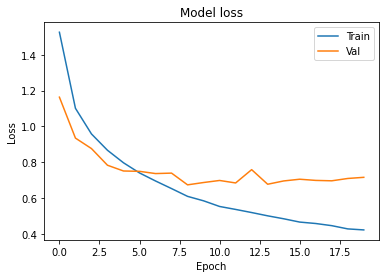

In [45]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [48]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 7s 23ms/step - loss: 0.7388 - accuracy: 0.7625


0.762499988079071

In [49]:
model.save('cifar10_model.h5')

# Testing out with your images

In [50]:
my_image = plt.imread("cat.jpg")

In [51]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

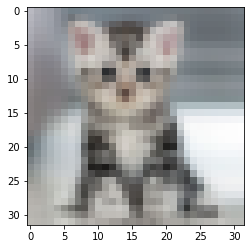

In [52]:
img = plt.imshow(my_image_resized)

In [53]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

1/1 [==============================] - 1s 555ms/step


In [54]:
probabilities

array([[3.90634796e-06, 1.97758476e-09, 1.11461640e-03, 5.73108196e-01,
        2.22495757e-02, 3.75612557e-01, 5.65116279e-05, 2.78541818e-02,
        3.39030152e-07, 1.02919635e-07]], dtype=float32)

In [55]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: cat -- Probability: 0.5731082
Second most likely class: dog -- Probability: 0.37561256
Third most likely class: horse -- Probability: 0.027854182
Fourth most likely class: deer -- Probability: 0.022249576
Fifth most likely class: bird -- Probability: 0.0011146164
